In [1]:
from scipy.io.wavfile import read
fs, data = read('suphi_noisy.wav')
fs1,cdata = read('suphi_clean.wav')
import numpy as np 
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cdata = cdata.astype("float32")
data = data.astype("float32")

# MSE

In [3]:
def mse(a,b):
    MSE = np.square(np.subtract(a,b)).mean(axis=None)
    return MSE

# AVERAGE & MEDIAN

In [4]:
def average_filter (data ,n):
    channel_1 = data[:,0]
    channel_2 = data[:,1]    
    channel1_output = np.empty([873693])
    channel2_output = np.empty([873693])
    
    for i in range(len(channel_1)):
        channel1_output[i] = np.sum(channel_1[i:i+n])/n
    for i in range(len(channel_2)):
        channel2_output[i] = np.sum(channel_2[i:i+n])/n
        
    output  = np.c_[channel1_output,channel2_output]
    return output

output1=average_filter(data ,2)

error=mse(output1,cdata)
error


38749.17859648641

In [6]:
def median_filter (data ,n):
    channel_1 = data[:,0]
    channel_2 = data[:,1]    
    channel1_output = np.empty(len(channel_1))
    channel2_output = np.empty(len(channel_1))
    for i in range(len(channel_1)):
        channel1_output[i] = np.median(channel_1[i:i+n])
    for i in range(len(channel_2)):
        channel2_output[i] = np.median(channel_1[i:i+n])
    output  = np.c_[channel1_output,channel2_output]
    return output
output_median= median_filter(data,5)
ola = mse(cdata,output_median)
ola

144220.1622011393

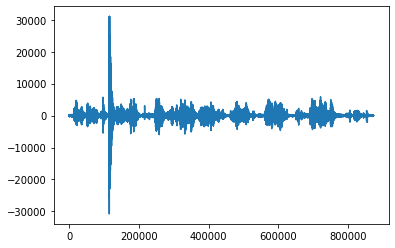

In [7]:
plt.plot(data[:,0])

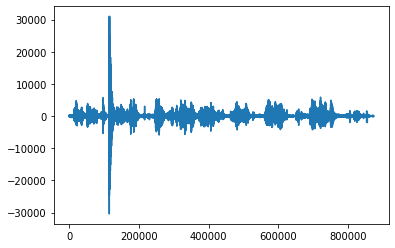

In [8]:
plt.plot(output1[:,0])

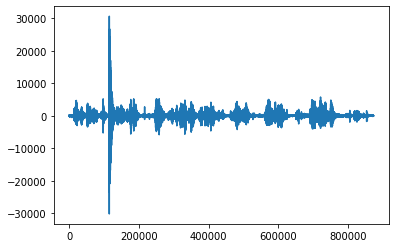

In [9]:
plt.plot(output_median[:,0])

# QUESTION 4

/home/ata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/ata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/ata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem pl

Text(0.5, 1.0, 'y[n]')

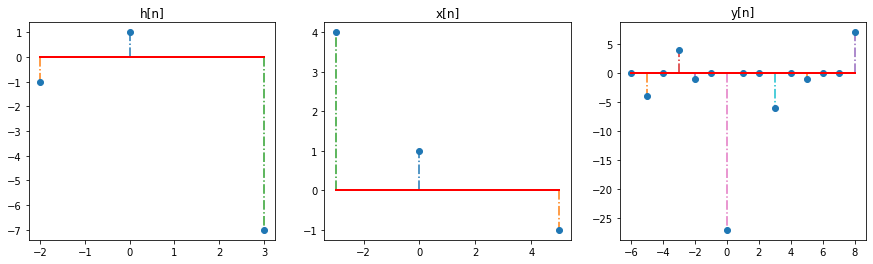

In [10]:
h_y =(1,-1,-7) # given inputs
h_x =(0,-2,3)
x_y=(1,-1,4)
x_x=(0,5,-3)
y_nx =[-5,-3,-2,0,3,5,8] 

def indexer (x,y):# indexing the given inputs between-6 and 8 
    indexlist=np.zeros(15)
    for j in range(len(x)):
        indexlist[x[j]+6]=y[j]
    return indexlist  

x_n= indexer(x_x,x_y)
y_n= indexer(h_x,h_y)

y_y=  np.convolve(x_n,y_n)#convolution part
y_x= np.arange(-6,9)

y_y =y_y[6:]# this part is required to match y_x and y_y values
y_y =y_y[:15]


plt.figure(figsize=(15, 4))# plotting part 
plt.subplot(1,3,1)
markerline, stemlines, baseline = plt.stem(h_x, h_y, '-.')
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
plt.title('h[n]')
plt.subplot(1,3,2)
markerline, stemlines, baseline = plt.stem(x_x, x_y, '-.')
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
plt.title('x[n]')
plt.subplot(1,3,3)
markerline, stemlines, baseline = plt.stem(y_x, y_y, '-.')
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
plt.title('y[n]')

# Challenge

In [11]:
import noisereduce as nr
cutter1=0.31054*len(data[:,0])/19

# select section of data that is noise
noisy_part = data[:int(cutter1),0]
# perform noise reduction
reduced_noise = nr.reduce_noise(audio_clip=data[:,0]/1.0, noise_clip=noisy_part/1.0,n_grad_freq=3,n_grad_time=2,  n_std_thresh=1.6,hop_length=256
    ,prop_decrease=1.0,verbose=False)
reduced_noise1= nr.reduce_noise(audio_clip=data[:,1]/1.0, noise_clip=noisy_part/1.0,n_grad_freq=3,n_grad_time=2,  n_std_thresh=1.6,hop_length=256
    ,prop_decrease=1.0,verbose=False)

finito = np.c_[reduced_noise,reduced_noise1]
mse(finito,cdata)

/home/ata/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


5767.1196

In order to have a good score in the challenge, I used an open source project which you can reach from here https://github.com/timsainb/noisereduce.
Directly using the library was not giving good results so I  optimized it for this challenge by arranging the parameters.The algorithm in the project follows this steps :

-An FFT is calculated over the noise audio clip.

-Statistics are calculated over FFT of the the noise (in frequency).

-A threshold is calculated based upon the statistics of the noise (and the desired sensitivity of the algorithm).

-An FFT is calculated over the signal.

-A mask is determined by comparing the signal FFT to the threshold.

-The mask is smoothed with a filter over frequency and time.

-The mask is appled to the FFT of the signal, and is inverted.
